<a href="https://colab.research.google.com/github/dayekb/urfu_master_class/blob/main/%D0%A3%D1%80%D0%A4%D0%A3_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%87%D0%BA%D0%B8_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Доступ к Python без регестрации и смс (ну почти)**

Статья на Habr про то как работает [Google Colab](https://habr.com/ru/companies/skillfactory/articles/673572/)

(не реклама)

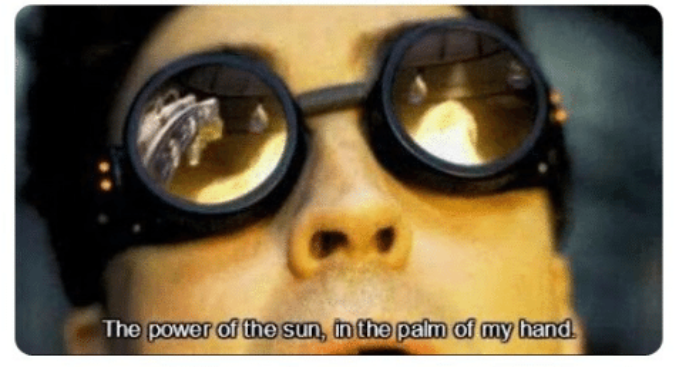

Сейчас открыта "моя" версия блокнота. Если вы что-то будете менять - изменения не сохранятся. Поэтому нужно сохранить копию блокнота себе на диск.

Чтобы сохранить блокнот себе на диск

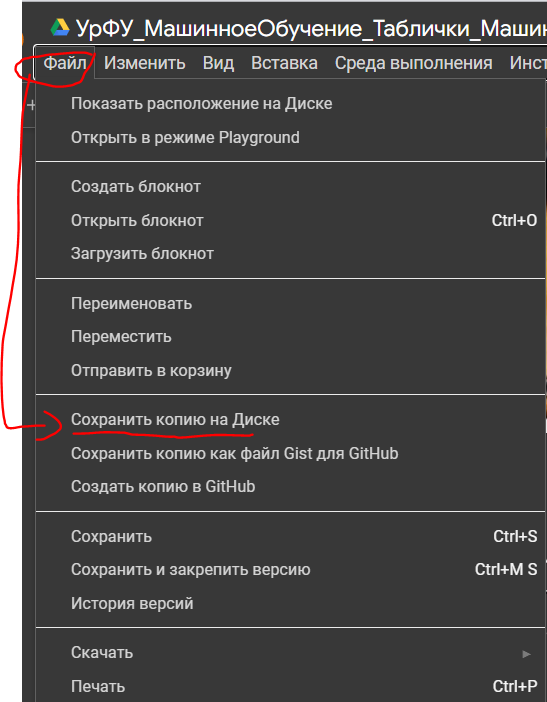

# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии. 

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный признак. 

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.


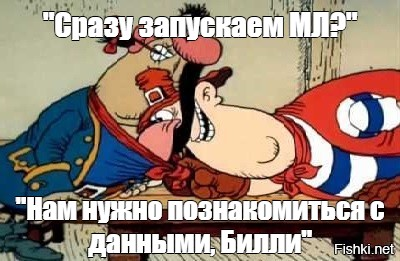

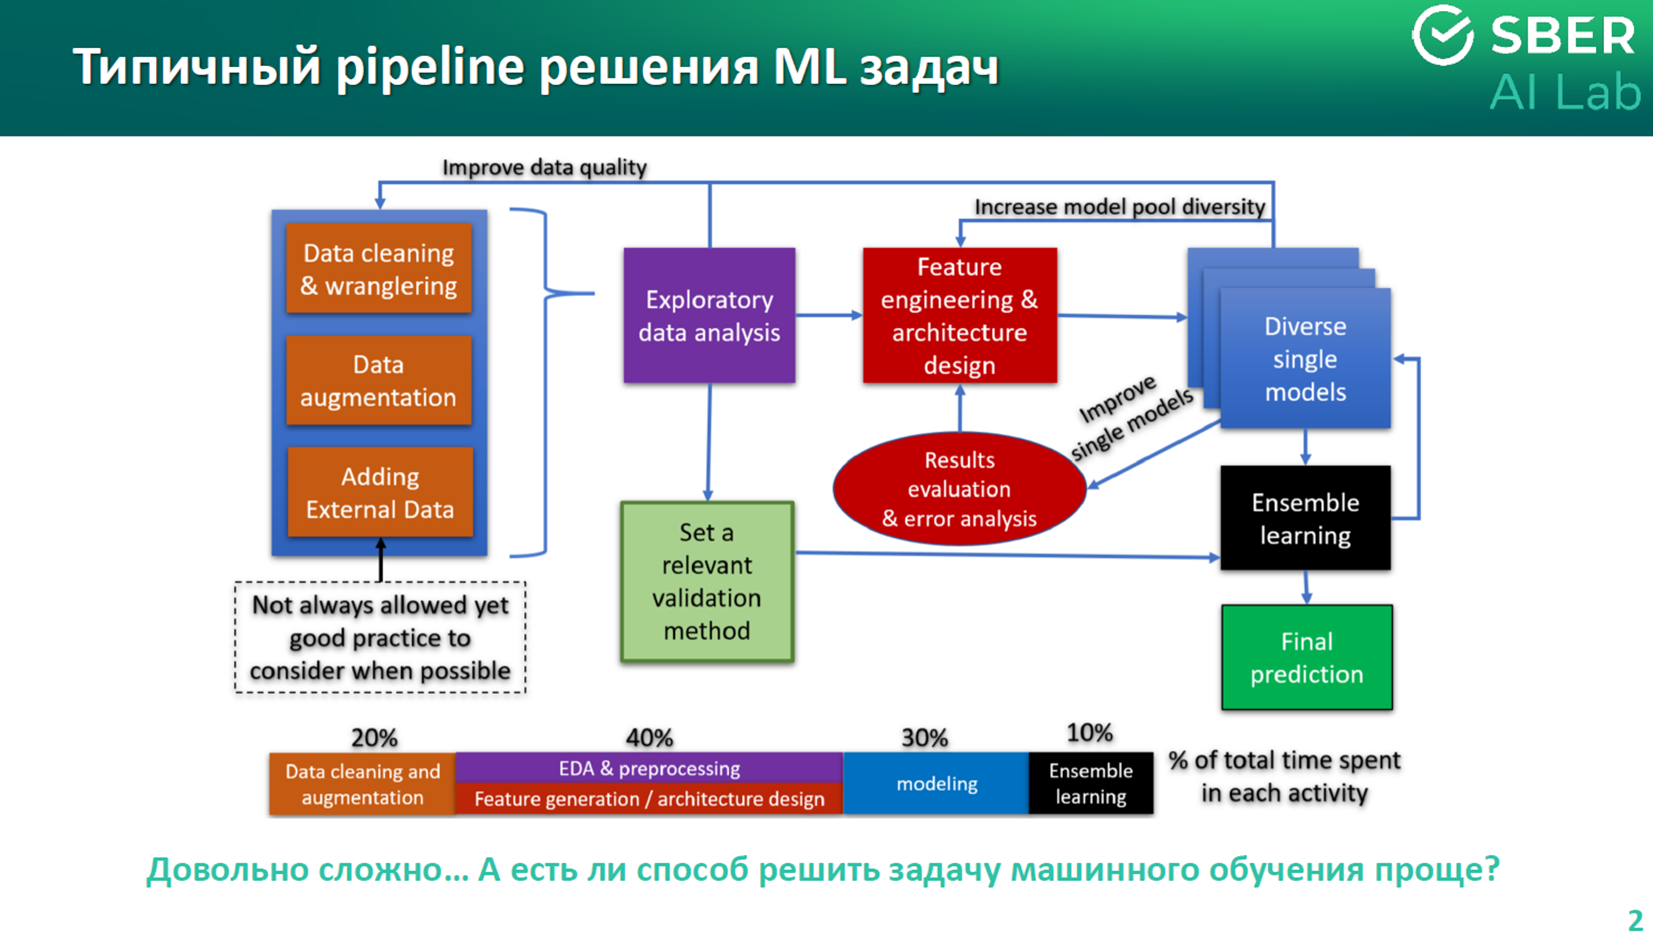

# Import библиотек

Чтобы воспользоваться наработками необходимо импортировать библиотеку

Обычно все импортируемы библиотеки размещаются в самом начале

Но мы будем импортировать постепенно

# Библиотека Pandas для работы с Табличными данными

In [ ]:
#↓ ключевое слово "импортируй"
#↓     ↓ название библиотеки
#↓     ↓         ↓ сокращенное название чтобы использовать в коде
import pandas as pd # Библиотека Pandas для работы с табличными данными

Каждая уважающая себя Библиотека имеет подробную документацию

[Pandas не исключение](https://pandas.pydata.org/)



## Считываем файл в DataFrame



метод `.read_csv(path,delimiter) `

* `path` путь к файлу + имя файла
* `delimiter` разделитель

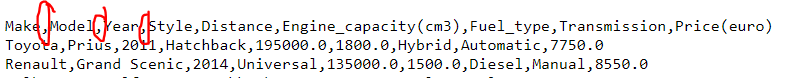

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars.csv',
                 delimiter = ',') # можно считывать открытые файлы из интернета

In [ ]:
df # в блокнотах Colab если запустить ячеку с переменной, то будет визуализирована эта переменная 

**Вопрос**: а что если данные в другом формате, например в `.xlxs` или `.json`?

**Ответ**:

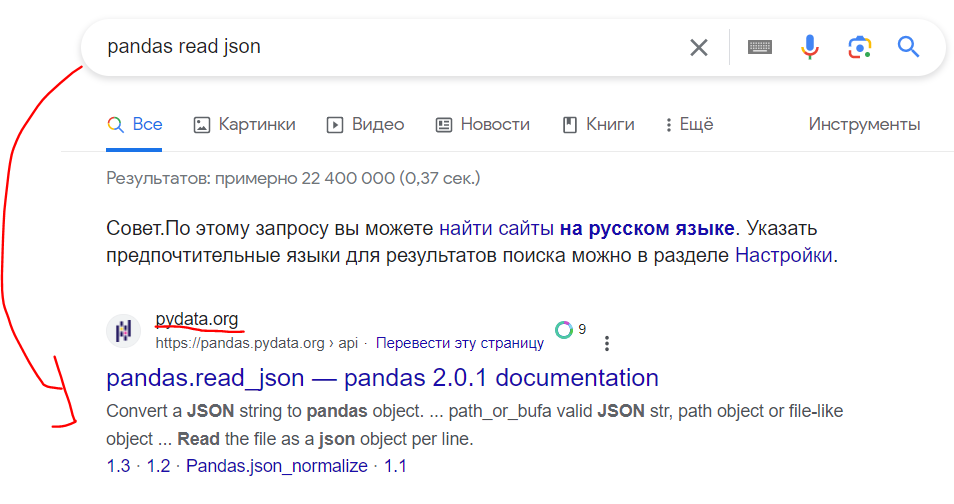

## Информация о DataFrame


Метод `.info() `

In [ ]:
df.info() # информация о данных в датафрейме: 
#сколько строк, 
#какие данные в столбцах, 
#сколько пропущенных значений (Nan-values)

## Поиск Дубликатов
 


методы `.duplicated()` и `.sum()`

In [ ]:
df.duplicated().sum() # метод .duplicated() возвращает данные в бинарном виде: является ли отдельная строка дубликатом (True если является)
#Просуммировав мы узнаем сколько всего дубликатов 

**Удаление дубликатов**

Методы `.drop_duplicates()` и `.reset_index()`

In [ ]:
DF = df.drop_duplicates() # Складываем в новый датафрейм результат удаления дубликатов

DF = DF.reset_index(drop=True) # обновим индексы в датафрейме DF. 
# если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы

DF

In [ ]:
DF.duplicated().sum() # проверили что дубликатов нет

## Сохранение DataFrame в файл


Метод `.to_csv(path, index)`

In [ ]:
DF.to_csv('/content/cars_moldova_no_dup.csv',index=False) # если хотим чтобы и индексы сохранились - пишем index = True

## Индексация

**Визуализация части DataFrame**

Метод `.head(n)` - первые `n` строк

In [ ]:
DF.head(6)

Метод `.tail(n)` - последние `n` строк

In [ ]:
DF.tail(9)

**Индексация**

аттрибут `.loc[строки, столбцы]`

In [ ]:
DF.loc[1437,'Transmission'] # конкретная ячейка 

In [ ]:
DF.loc[:,'Transmission'] # столбец в формате Серий (Series)

In [ ]:
DF.loc[:,['Transmission']].head(5) # столбец в формате датафрейма

In [ ]:
DF.loc[:,['Transmission','Year']].head(5) #несколько столбцов перечислением

In [ ]:
DF.loc[:,'Make':'Style'].head(5) #несколько столбцов в формате "от" и "до"

In [ ]:
DF.loc[69,:] # строка в формате Серий (Series)

In [ ]:
DF.loc[69:69,:] # строка в формате датафрейма

In [ ]:
DF.loc[322:1437,:] # несколько строк

In [ ]:
DF.loc[227:229,'Make':'Fuel_type'] #некоторые столбцы и строки

**Логическое Индексирование**

In [ ]:
DF[DF['Transmission']=='Manual'] # можно ставить произвольные условия

In [ ]:
DF[(DF['Transmission']=='Manual') & (DF['Year']>2000)] #пример как объединить два условия вместе

## Сортировка DataFrame



Метод `.sort_values(by)`

`by` - по какой колонке сортируем

In [ ]:
DF.sort_values(by = 'Price(euro)').head(5) # по возрастанию


Метод `.sort_values(by, ascending= False)`

In [ ]:
DF.sort_values(by = 'Year', ascending= False).head(5) # по убыванию

Можно по нескольким колонкам сразу

In [ ]:
DF.sort_values(by = ['Price(euro)','Engine_capacity(cm3)'],
               ascending=[True, False]).head(5) 

Сначала сортирует по первой, потом по второй

In [ ]:
DF.sort_values(by = ['Engine_capacity(cm3)', 'Price(euro)'],
               ascending=[True, True]).head(5) 

### Задание 1

(да, размер описания задания уменьшается, что делать)

**Вариант 1**
* Выберите из полного датафрейма строки с индекса `69` по `322`. 
* Отсортируйте полученный датафрейм по колонке `'Distance'` по убыванию. 
* Какое значение колонки `'Style'` у полученного датафрейма во второй строке сверху

**Вариант 2**
* Выберите из полного датафрейма строки которые соответсвуют условиям тип топлива `'Fuel_type'` равен `'Petrol'`. 
* Укажите самую дорогую марку автомобиля `'Make'` 

**Вариант 3**
* Найдите самую старую модель `'Model'` марки `'Mercedes'`

In [ ]:
# Введите ваш код сюда

# EDA - Разведывательный анализ данных.

Цель разведывательного анализа данных - попытка предварительного понимания того, с чем вы имеете дело. Например, результатами анализа могут быть удаление аномалий, заполнение (удаление) пропусков, визуализация данных, выделение признаков или получение (или преобразование) новых признаков, удаление некоторых шумов, помех или других нерегулярных значений.


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [ ]:
DF.info()

In [ ]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in DF.columns: # смотрим на все колонки в датафрейме
    if (DF[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно 

# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

## Анализ числовых признаков 

Статистика по числовым данным 

метод `.describe()`

In [ ]:
DF.describe() # посчитает "стандартные" статистические параметры для числовых данных
# если данные с типом отличных от числовых - то они проигнорируются

### Агрегация

К датафрейму применяется метод `.groupby()` с указанием (по чему группировать), а затем то, что хотим посчитать по группе (в данном случае `.mean()`)

In [ ]:
DF.groupby(['Transmission'],).mean(num_columns)

Или даже более сложная статистика

К датафрейму применяется метод `.groupby()` с указанием (по чему группировать), а затем `.agg()`, где **списком** перичисляем то что хотим посчитать

список состоит из элементов вида `('название', функция)`


In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

In [ ]:
DF.groupby(['Transmission'],)[num_columns].agg( [ ('median',np.median),
                                    ('std',np.std), 
                                    ('Q5%', lambda x: np.percentile(x, q=5)), 
                                    ('Q95%',lambda x: np.percentile(x, q=95))])

### Задание 2

**Вариант 1**

Используя аггрегацию найдите самую дорогую (в среднем) марку автомобилей (столбец `'Make'`)

**Вариант 2**

Используя аггрегацию найдите модели (столбец `'Model'`) с наибольшим средним пробегом 

**Вариант 3**

Используя аггрегацию найдите тип топлива (столбец `'Fuel_type'`) который самый молодой (в среднем)

In [ ]:
# Введите ваш код сюда

## Корреляция числовых признаков 

Посмотрим на корреляцию числовых столбцов

`.corr()` для получения матрицы корреляции из датафрейма (нечисловые признаки будут проигнорированы)

`.style.background_gradient(cmap, vmin, vmax)` чтобы подсветить красиво таблицу

In [ ]:
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

DF[num_columns].corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

Больше вариантов [цветовых стилей seaborn](https://seaborn.pydata.org/generated/seaborn.color_palette.html)

Но статистика не всегда даёт ответы на все вопросы

### Вопрос 1

Как вы считаете что общего у групп данных ниже?

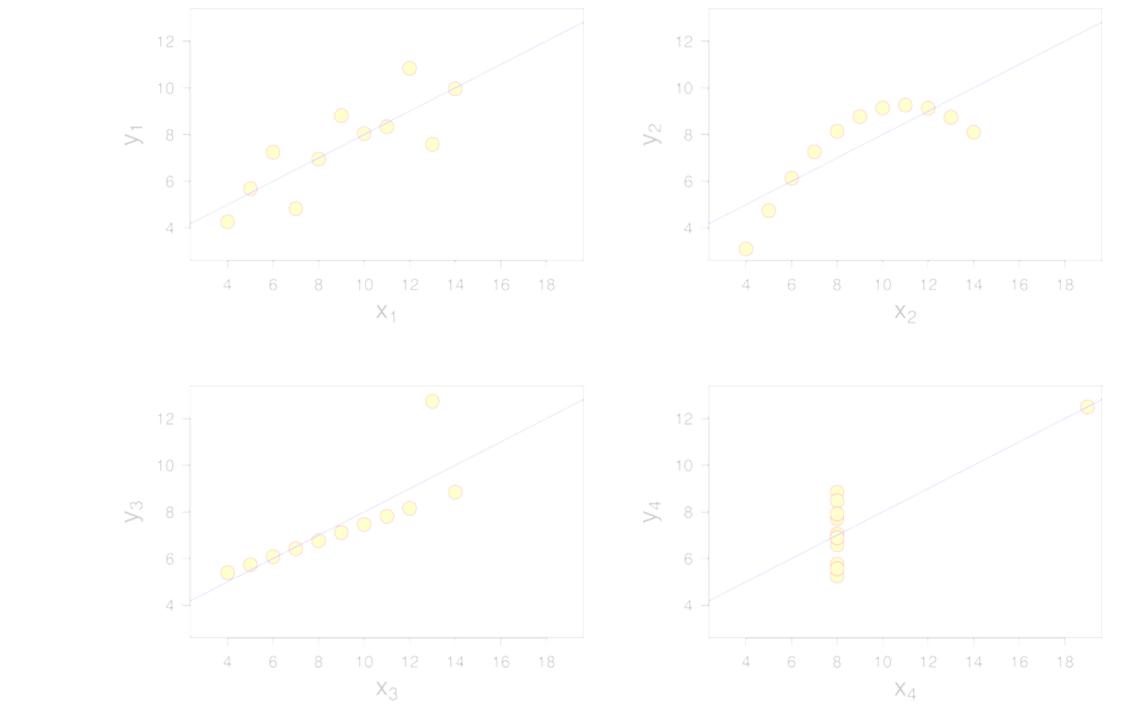

В Data Science любят прокачивать идеи по максимуму

In [ ]:
from IPython.display import Image # чтобы визуализировать гифку в браузере
Image(url='https://blog.revolutionanalytics.com/downloads/DataSaurus%20Dozen.gif')

# Библиотеки для визуализации данных

In [ ]:
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации

Документация библиотеки [matplotlib](https://matplotlib.org/)

Документация библиотеки [seaborn](https://seaborn.pydata.org/)

In [ ]:
plt.style.use('dark_background') # для модных черных рисунков

[Разные Стили](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

## Гистограммы распределений

рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

Гистограмма seaborn  `.histplot(data, x, bins)`

In [ ]:
# рисуем с помощью библиотеки seaborn
sns.histplot(data=DF, # какой датафрейм используем 
            x='Engine_capacity(cm3)', # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем 

Но как-то лень это всё вручную прописывать...

Поэтому напишем код который будет делать это за нас

In [ ]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные 
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовку
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=DF, # какой датафрейм используем 
            x=column_name, # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем 

Столбцы имеют явные аномалии, особенно `Distance` и `Price(euro)`. Чтобы лучше понять эти аномалии посмотрим на столбцы в логарифмическом масштабе.

In [ ]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=DF, # какой датафрейм используем 
             x='Price(euro)', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем 
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

In [ ]:
# Удалим те объекты у которых Расстояние равно 0
question_dist = DF[DF.Distance == 0] # через логическое индексирование определяем проблемные данные
DF = DF.drop(question_dist.index) # удаляем данные по проблемным индексам 

plt.figure(figsize=(15,6))
sns.histplot(data=DF,
        x='Distance', 
        bins = 20, 
        log_scale = True);

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы. 

Также, так как задача хорошо интерпретируема мы можем почистить столбцы пользуясь здравым смыслом. 

Например, мы можем удалить записи, где цена меньше 100 евро или пробег меньше 1000 км и год старый.

In [ ]:
# здравый смысл
question_dist = DF[(DF.Year <2021) & (DF.Distance < 1100)]
DF = DF.drop(question_dist.index)

# анализ гистограмм
question_dist = DF[(DF.Distance > 0.5e6)]
DF = DF.drop(question_dist.index)

# здравый смысл
question_engine = DF[DF["Engine_capacity(cm3)"] < 200]
DF = DF.drop(question_engine.index)

# здравый смысл
question_engine = DF[DF["Engine_capacity(cm3)"] > 5000]
DF = DF.drop(question_engine.index)

# здравый смысл
question_price = DF[(DF["Price(euro)"] < 101)]
DF = DF.drop(question_price.index)

# анализ гистограмм
question_price = DF[DF["Price(euro)"] > 0.5e5]
DF = DF.drop(question_price.index)

#анализ гистограмм
question_year = DF[DF.Year < 1971]
DF = DF.drop(question_year.index)

DF = DF.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы

### Задание 3

Посмотрите сколько данных (в строках) осталось

In [ ]:
# Введите ваш код сюда

Посмотрим на результат

In [ ]:
# аналогично рассмотреному выше примеру, только уже без проблемных данных
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=DF,
            x=column_name, bins = 20);

## Зависимости параметров друг от друга

pairplot seaborn 
`.pairplot(data, hue, palette)`

по диагонали - гистограммы распределения отдельных признаков

другие элементы - скатерограммы

Важно!
Если признаков много (больше 5-10) то будет отрисовывать очень долго.
Поэтому предварительно разбиваем на подгруппы

[Перечень цветовых карт ](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
sns.pairplot(data = DF,  # какой датафрейм используем
             hue ='Transmission', # какую переменную используем для подкрашиваиния данных. 
                                # Рекомендуется использовать Категориальные данные (не очень много уникальных значений)
             palette = 'bwr',); # какую цветовую карту используем. Здесь у нас всего 2 варианта, то мы используем bwr - один из Diverging
                                # если категорий больше, то лучше использовать что-то из Qualitative

### Домашнее задание №1

Ознакомьтесь c библиотекой `seaborn`

Попробуйте разные виды графиков для числовых признаков – скатерограммы, гистограммы, и т. д.

Для скатерограмм попробуйте использовать категориальные данные для таких параметров графиков, как оттенок (`hue`), размер маркера (`size`), тип маркера (`style`). 

Таким образом, вы можете объединить информацию о нескольких признаков в один двумерный график


Нарисуйте как минимум 3 разных графика (как минимум на одном графике вам нужно сделать раскраску (цель категориальная/классификация) или размер (цель числовая/регрессия) маркеров на основе целевого класса/значений)

In [ ]:
# Введите ваш код сюда

# Предварительная Обработка Данных

Наверное то что у нас данные имееют разный порядок это не очень хорошо

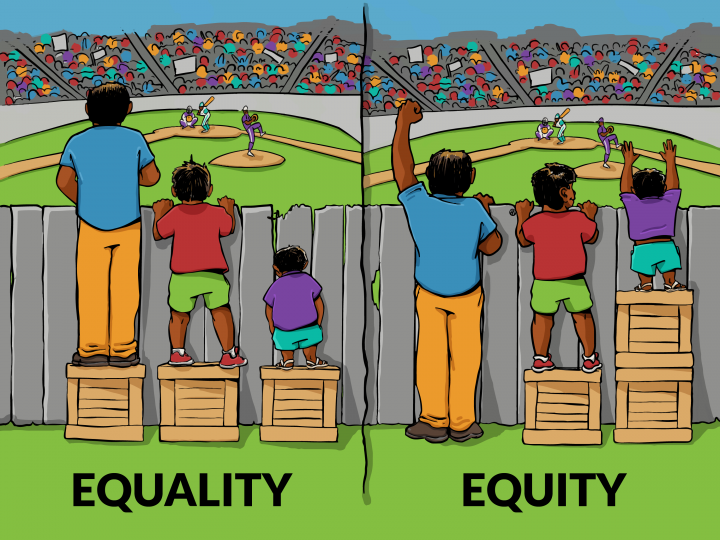

## **Нормализация**

$$ x' =\frac{x - \min(x)}{\max(x) - \min(x)}$$

In [ ]:
DF_norm  = DF.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
Xmin = DF[num_columns].min() # находим минимум (для каждого числового признака)
Xmax = DF[num_columns].max() # находим максимум (для каждого числового признака)
                                                # ↓ каждый столбец делится на свою разницу максимума и минимума
DF_norm[num_columns] = (DF[num_columns]- Xmin)/( Xmax - Xmin) # реализуем нормализацию. матричные операции работают
                                        # ↑ из каждого стобца вычитаем свой минимум

Распределение исходных данных

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF, # какой датафрейм используем
             x = 'Distance', # какую переменную отрисовываем
             hue = 'Transmission', # какую переменную используем для подкрашиваиния данных. 
             bins = 15, # на сколько ячеек разбиваем 
             kde = True, # чтобы отрисовал оценку плотности распределения
             palette='bwr'); # какую цветовую карту используем.

Распределение данных после нормализации

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr');

## **Стандартизация**

$$ x' =\frac{x - mean(x)}{std(x)}$$

In [ ]:
DF_scaled = DF.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
M = DF[num_columns].mean() # находим среднее (для каждого числового признака)
STD = DF[num_columns].std() # находим стандартное отклонение (для каждого числового признака)
DF_scaled[num_columns] = (DF[num_columns]-M)/STD # реализуем стандартизацию. матричные операции работают

Распределение данных после стандартизации

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr');

## **Нелинейное преобразование**



Сначала логарифмирование, потом стандартизация

In [ ]:
DF_power  = DF.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
DF_power[num_columns] = np.log(DF_power[num_columns]) # натуральный логарифм применится ко всем  столбцам, которые мы укажем
# ниже как при стандартизации
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

Распределение исходных данных

In [ ]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF,
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr');


Распределение данных после лагорифмирования и стандартизации

In [ ]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power, 
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr');

## Категориальные данные
посмотрим на число повторений результата в каждом категориальном признаке

метод `.nunique()`

In [ ]:
DF[cat_columns].nunique()   # возврашает Серию. 
                            #В роли индексов - название столюцов
                            #значения - количество уникальных значений в столбце

Оказалось, что часть из наших признаков имеют слишком много записей. Вероятно, редкие из них можно исключить без потери точности. Мы сделаем эту операцию объявив такие записи одним типом - rare.

Считаем сколько раз каждое значение категории встретчается методом 

`.value_counts()`

In [ ]:
counts = DF.Make.value_counts() # сначала посмотрим на столбец Make

counts  # опять Серия. 
        #В роли Индексов - уникальное значение столбца
        #В роли значений  - сколько раз это значение встречается

In [ ]:
counts.median() # оцениваем медиану встречаемости разных признаков

In [ ]:
counts[counts<100] # посмотрим на марки которые встречаются реже чем 100 раз

In [ ]:
rare =  counts[(counts.values < 25)] # находим все редкие категории
DF['Make'] = DF['Make'].replace(rare.index.values, 'Rare') # заменим все редкие значения на "Rare"
                                # берем индексы, потому что в индексах rare скрыты редкие значения
                                # применяем values чтобы получился массив numpy
DF.Make.value_counts() # пересчитаем сколько кого осталось

Аналогичные действия, но для столбца `Model`

Считаем встречаемость отдельных моделей

In [ ]:
counts = DF.Model.value_counts()

counts

Оцениваем медиану

In [ ]:
counts.median()

In [ ]:
counts[counts<15]

Заменяем редкие

In [ ]:
counts = DF.Model.value_counts()
rare =  counts[(counts.values <  5)]
DF['Model'] = DF['Model'].replace(rare.index.values, 'Rare')
DF.Model.value_counts()

### Домашнее задание № 2

Попытайтесь реализовать «умную» замену на редкие категории. 
В этот раз делайте замену вида «редкий дорогой» и «редкий дешевый», чтобы условные УАЗики не попали в одну группу с Jaguar


In [ ]:
# Введите ваш код сюда

## Приведение категориальных признаков к численным

### Бинарные признаки

Если вариантов не много - то можно "вручную" прописать

и использованием метода `.map()`

In [ ]:
DF['Transmission'] = DF['Transmission'].map({'Automatic': 1, 'Manual': 0})# в данном случае задаем словарь
# где key (ключ) - исходное значение, value (значение) - на что конкретный ключ будет заменен

### Кодирование многозначных признаков

Альтернативно можно перевести в тип данных категориальный и потом провести кодирование

In [ ]:
df_se = DF.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category') # задаем тип

for _, column_name in enumerate(cat_columns): # перебираем все колонки 
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info() # по типам данных видно что пропали Object

Так же замечаем, что теперь наш датафрейм занимет меньше места

In [ ]:
df_se.head() #действительно одни цифры

### One-hot кодирование многозначных признаков

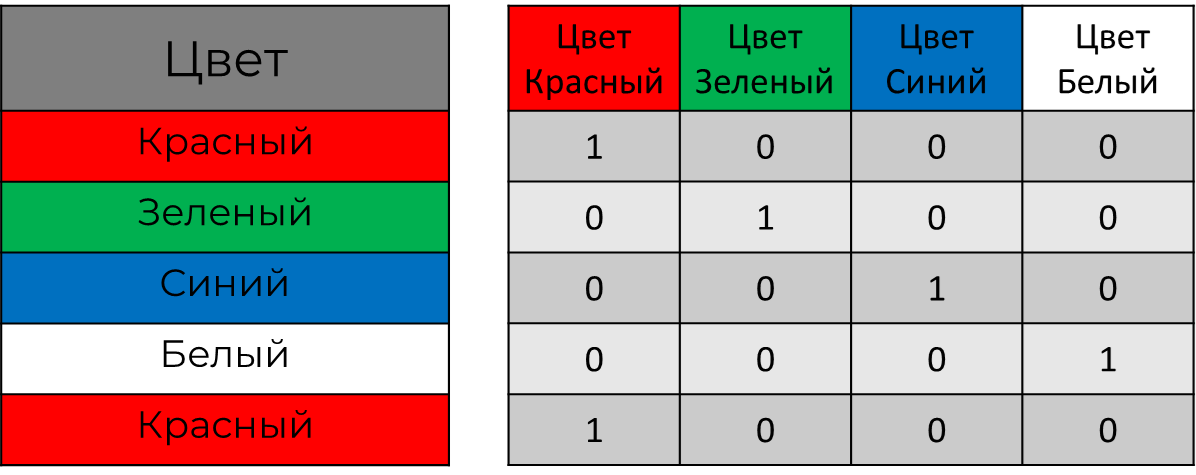

Реализация от Pandas - через метод `.get_dummies()` 

Применяем к оригинальному датафрейму

Важно - он будет ориентироваться на тип данных

С числовыми признаками он ничего делать не будет


In [ ]:
df_ohe = DF.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

Данных стало больше

In [ ]:
df_ohe.info()

## Сохранение DataFrame в файл

Метод `.to_csv(path, index) `

Отдельно сохраним простое Нормировку числовых данных, Кодирование категориальных данных и one-hot кодирование

In [ ]:
DF_norm.to_csv('/content/cars_moldova_normalizecsv',index=False)
DF_scaled.to_csv('/content/cars_moldova_standard.csv',index=False)
DF_power.to_csv('/content/cars_moldova_log_standard.csv',index=False)

df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)

# Наконец-то модели

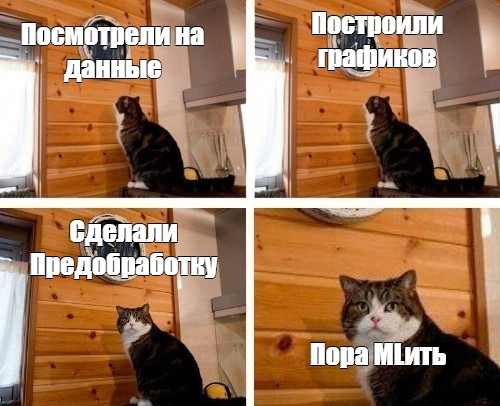

Полезная абстракция для моделей машинного обучения



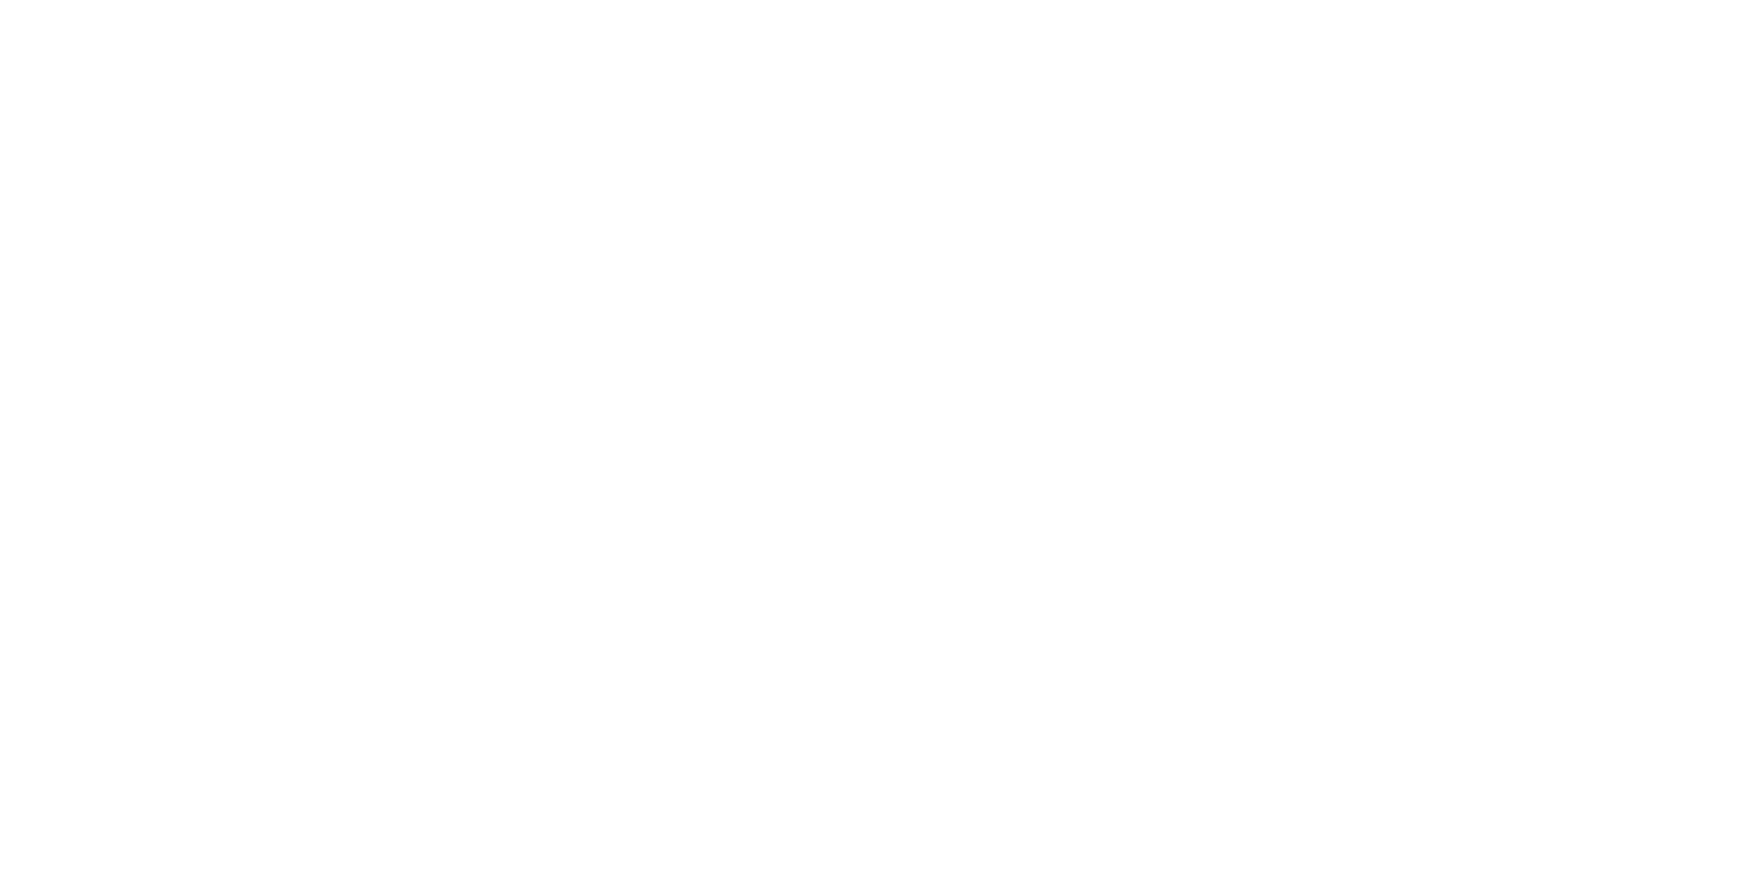

[scikit-learn](https://scikit-learn.org/stable/index.html)

Наверное самая классная библиотека для начала работы с ML

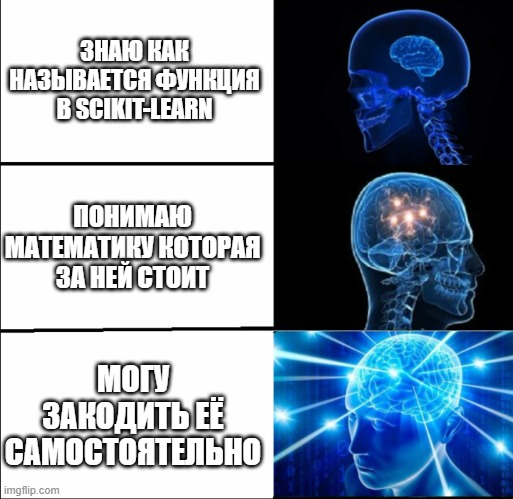

# Линейная Регрессия

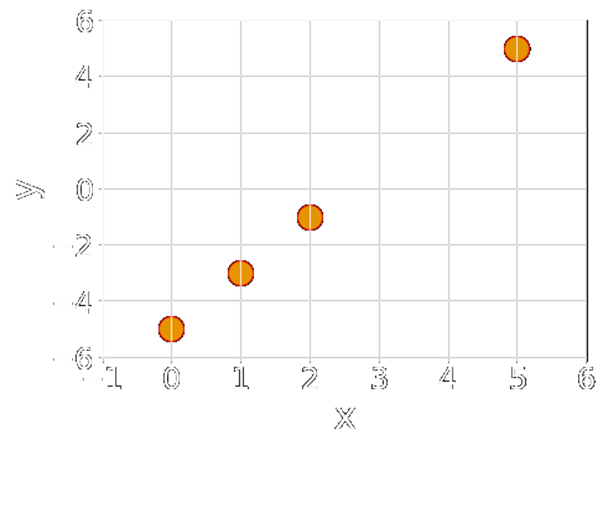

### Вопрос 2

Чему равны b0 и b1

## Импорт вкусного из scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression # Линейная регрессия от Scikit-learn
# Некоторые метрики регрессии
from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку

Вспомогательные функции

### вытаскивание коэффициентов из модели

In [ ]:
def get_coefs (model):
    B0=model.intercept_
    B=model.coef_
    return B0, B

### пишем модель

In [ ]:
def print_model (B0,B,features_names):
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

### визуализации весов в виде столбчатых диаграмм

In [ ]:
def vis_weigths(weights,features_names = None):
    """Отрисовка весов.   
    Входные переменные:
    ===========
    weights: веса
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    cc=['']*len(numbers)                                # сюда будем складывать цвет в который будем подкрашивать 
    for n,val in enumerate(weights):                    #перебираем все веса
        if val<0:                                       # если отрицательный вес - то красный
            cc[n]='red'
        elif val>=0:                                    # если положительный - то синий
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)  # рисуем столбчатую диаграмму. с разными цветами
    plt.xticks(np.arange(0,len(weights)),tick_labels,   #подписи к столбцам
               rotation = 45);                          

## Подготавливаем данные

* Считываем данные
* разбиваем на *Признаки* и *Целевую переменную*
* разбиваем выборку на тестовую и тренировочную

In [ ]:
# Возьмем стандартизированные данные
df_num = DF_scaled[num_columns].copy()# берем, например только числовые данные 

# не забываем удалить целевую переменную цену из признаков
X = df_num.drop(columns = ['Price(euro)'])
y = df_num['Price(euro)']

# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Применение Моделей Машинного обучения

* Создаем модель-объект

* Обучаем через `.fit()`

* Предсказываем через `.predict()`

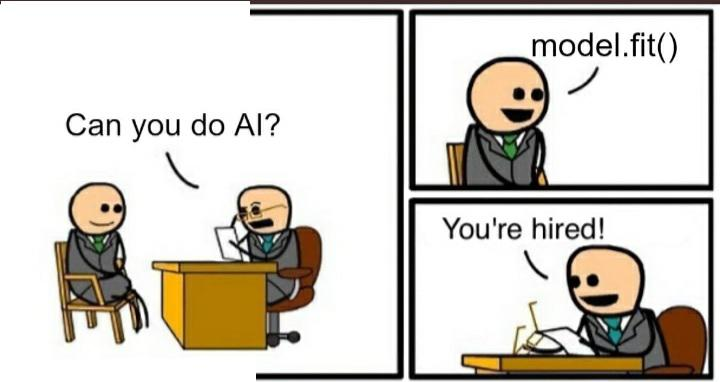

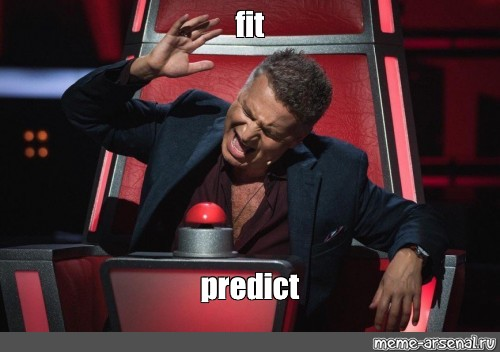

In [ ]:
# Создаем экземпляр класса 
lr = LinearRegression(fit_intercept=True)

# Применяем метод fit 
lr.fit(X_train, y_train);

# Применяем метод predict для единых данных 
y_predict=lr.predict(X_test);

### Напишем полученное решение

In [ ]:
B0, B = get_coefs(lr)
features_names = list(X.columns)

print_model (B0,B,features_names)

### Визуализация весов

In [ ]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

### Оцениваем модель по метрикам

На тестовой выборке

In [ ]:
print('Mean squared error: %.4f' % mse(y_test,y_predict))
print('R2 : %.2f' %  r2_score(y_test,y_predict))

### Визуализация

поскольку входных данных - много, то просто `y = f(x)` не отрисовать 

поэтому выкручиваемся визуализацией предсказаний

Ну или скатерограмма

In [ ]:
def scatter_plot(y_test, y_predict):
    plt.subplot(1,2,1)
    plt.scatter(y_test, y_predict)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], "r--", lw=4)
    plt.xlabel('истинные значения')
    plt.ylabel('предсказанные значения')
    plt.grid()

    plt.subplot(1,2,2)

    plt.scatter(y_test,  y_test - y_predict)
    plt.plot([y_test.min(), y_test.max()],
             [0, 0], "r--", lw=4)
    plt.xlabel('истинные значения')
    plt.ylabel('разница')
    plt.grid()

In [ ]:
fig = plt.figure(figsize=(15, 6))
scatter_plot(y_test, y_predict)

Предсказываем так себе, но это пробная модель, чего вы хотели)

### Домашнее задание №3

1. Протестируйте разные типы предварительной обработки данных
2. Протестируйте насколько полезными окажутся категориальные признаки
3. Попробуйте добавить в модель новые признаки
4. `*` Подсмотрите в scikit-learn другие модели для [регрессии](https://scikit-learn.org/dev/supervised_learning.html#supervised-learning) и попробуйте применить их (в среднем лучше должны сработать некто Ближайшие Соседи и Ансамбли)

In [ ]:
# Введите ваш код сюда

# Полезные ссылки

1. Мой [гитхаб](https://github.com/dayekb/Study) с учебными материалами (для магистратур УрФУ).
Там есть много презентаций, примеров, ссылок на различные ресурсы и т.д.

2. [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw) - изумительный youtube-канал с прекрасной анимацией математических концепций

3. [StatQuest with Josh Starmer](https://www.youtube.com/user/joshstarmer) - объяснение разных алгоритмов машинного обучение под гитарку

4. [Библиотека scikit-learn](https://scikit-learn.org/dev/index.html) - база для моделей машинного обучения
